In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK ")


Imports OK 


W tej komórce importujemy podstawowe biblioteki numeryczne i do wizualizacji (numpy, matplotlib) oraz kluczowe elementy biblioteki TopFarm, wykorzystywanej do modelowania i optymalizacji układu farm wiatrowych.

Zaimportowane komponenty umożliwiają:

zdefiniowanie problemu optymalizacyjnego farmy wiatrowej,

narzucenie ograniczeń geometrycznych (granice obszaru, minimalne odległości między turbinami),

uwzględnienie modeli kosztowych,

wizualizację rozmieszczenia turbin.

Wyświetlenie komunikatu „Imports OK” oznacza, że wszystkie biblioteki zostały poprawnie załadowane i środowisko obliczeniowe jest gotowe do dalszej pracy.
Z punktu widzenia praktyki projektowania farm wiatrowych jest to ważny krok kontrolny — potwierdza, że narzędzia potrzebne do analizy i optymalizacji są poprawnie skonfigurowane, zanim przejdziemy do właściwych obliczeń.

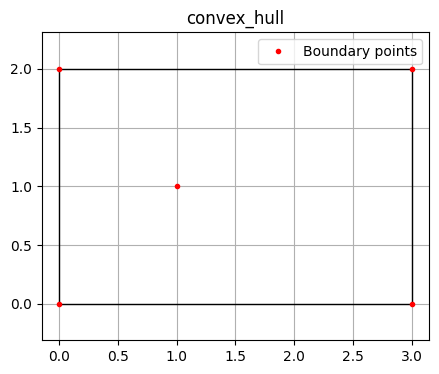

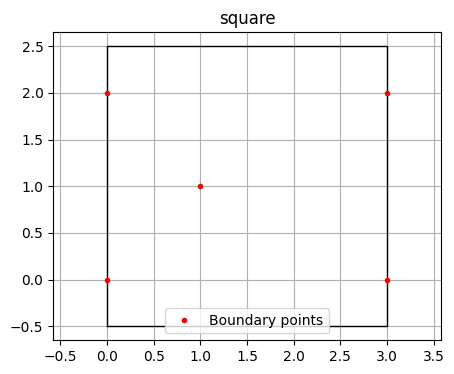

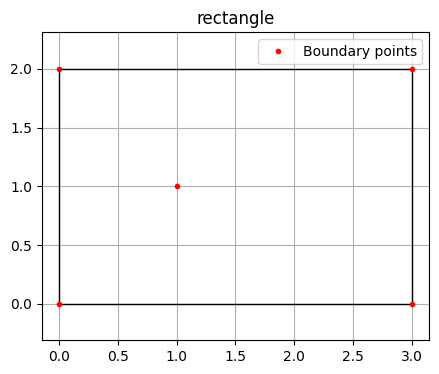

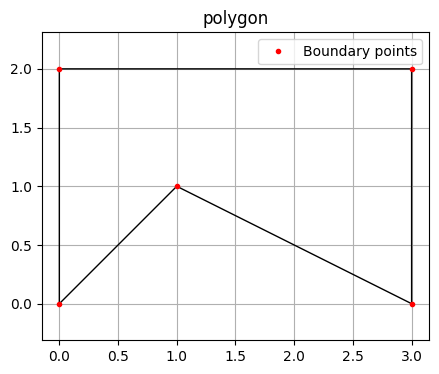

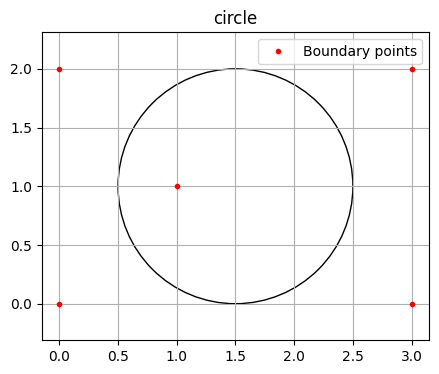

In [2]:
# 1) Punkty granicy (współrzędne w "umownych" jednostkach)
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# 2) “Sztuczne” turbiny (tylko do rysowania)
x = [0.5, 1.5]
y = [0.5, 1.5]

# 3) Dummy koszt: nie optymalizujemy jeszcze AEP, tylko potrzebujemy obiektu problemu
dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

# 4) Różne typy granicy (to jest “wow” wizualizacji)
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

W tej części notebooka definiujemy przykładowy obszar, na którym potencjalnie może zostać zaprojektowana farma wiatrowa. Granica obszaru jest zadana jako zbiór punktów tworzących wielokąt w „umownych” jednostkach współrzędnych.

Następnie definiujemy dwie „sztuczne” turbiny, które nie są jeszcze optymalizowane — służą jedynie do celów wizualizacji i demonstracji działania ograniczeń przestrzennych.

Aby umożliwić rysowanie granic bez uruchamiania pełnej optymalizacji, używany jest prosty (dummy) model kosztowy. Pozwala to stworzyć obiekt problemu TopFarm wyłącznie w celu pokazania, jak różne typy ograniczeń wpływają na dopuszczalny obszar rozmieszczenia turbin.

Wygenerowane wykresy pokazują różne sposoby interpretacji tej samej granicy:

convex hull – wypukłe otoczenie punktów granicznych,

square i rectangle – uproszczone obszary prostokątne,

polygon – dokładny wielokąt zadany przez punkty,

circle – obszar kołowy zdefiniowany środkiem i promieniem.

Z punktu widzenia praktyki projektowej jest to bardzo istotny etap: wybór typu granicy wpływa bezpośrednio na dostępny obszar dla turbin, a tym samym na gęstość zabudowy, możliwą produkcję energii oraz zgodność z ograniczeniami formalnymi (działki, obszary chronione, strefy buforowe).

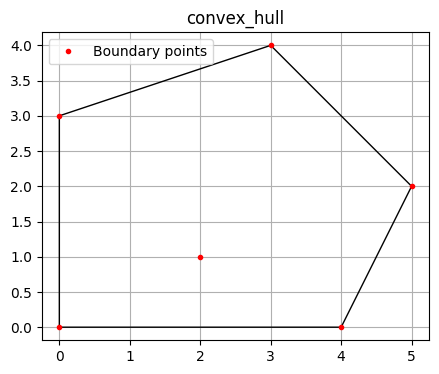

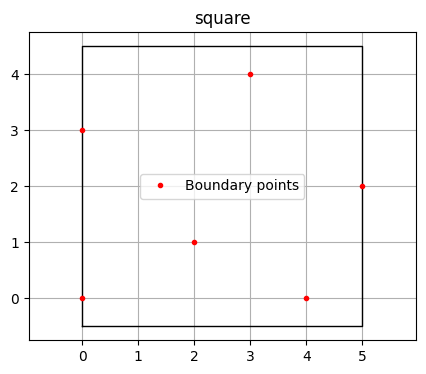

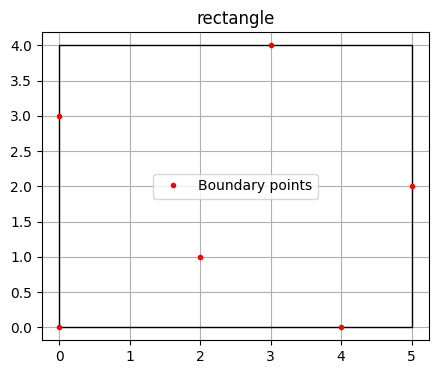

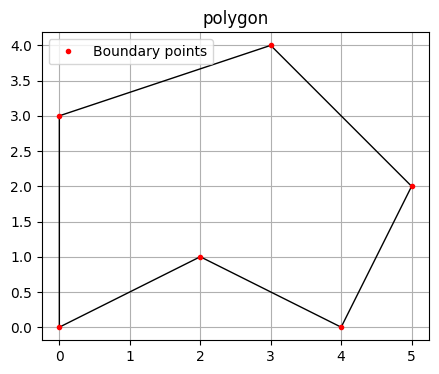

In [3]:
boundary = np.array([
    (0, 0),
    (2, 1),
    (4, 0),
    (5, 2),
    (3, 4),
    (0, 3)
])

for boundary_type in ['convex_hull', 'square', 'rectangle', 'polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))

W ramach tego kroku zaprojektowaliśmy obszar farmy wiatrowej, definiując jej granice za pomocą zestawu współrzędnych. Przetestowaliśmy cztery różne typy ograniczeń geometrycznych: convex_hull, square, rectangle oraz polygon.

Kluczowe obserwacje i różnice:

Zaprojektowana granica: Wykorzystaliśmy nieregularny kształt zdefiniowany przez tablicę punktów, który w praktyce projektowej może odpowiadać rzeczywistym uwarunkowaniom terenowym, takim jak granice działek, ukształtowanie terenu czy przeszkody naturalne.

Convex Hull (Otoczka wypukła) vs Polygon (Wielokąt):

Polygon: Ściśle odwzorowuje zadane punkty, pozwalając na uwzględnienie wklęsłości w obszarze farmy. Jest to istotne w praktyce budowy farm wiatrowych, gdy musimy omijać konkretne obszary wyłączone z zabudowy.

Convex Hull: Tworzy najmniejszy możliwy zbiór wypukły zawierający wszystkie punkty. Powoduje to "wygładzenie" i uproszczenie granic, co może skutkować włączeniem do obszaru farmy terenów, które nie były pierwotnie planowane jako dostępne, ale ułatwia to planowanie infrastruktury liniowej.

Wybór między tymi typami granic ma bezpośredni wpływ na liczbę i rozmieszczenie turbin, które można optymalnie posadowić na danym terenie.

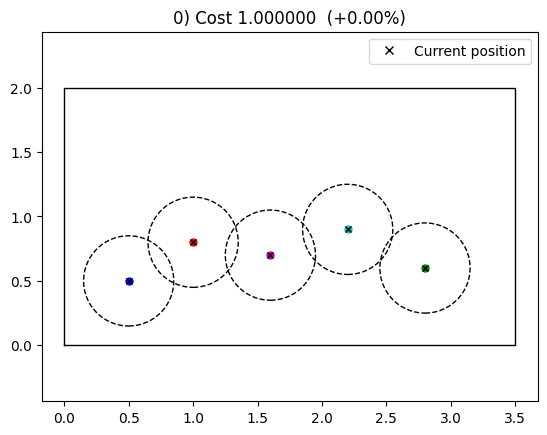

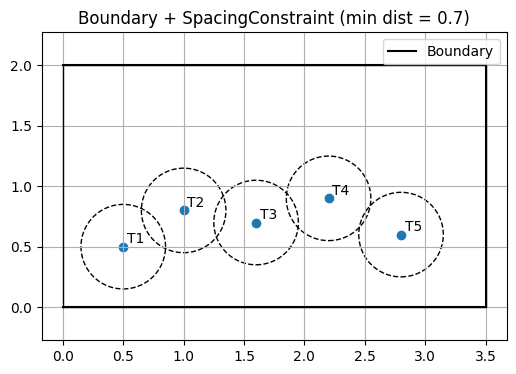

In [4]:
# Układ 5 turbin (na start celowo dość blisko)
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

# Duża prostokątna granica, żeby “nie przeszkadzała”
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

spacing = 0.7  # <- spróbujmy 0.4 / 0.7 / 1.0 i zobaczmy różnicę
tf = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing)
    ],
    plot_comp=XYPlotComp()
)

tf.setup()
tf.evaluate()

plt.figure(figsize=(6, 4))
plt.title(f"Boundary + SpacingConstraint (min dist = {spacing})")
tf.plot_comp.plot_constraints()
plt.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
plt.scatter(x5, y5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    plt.text(xx + 0.03, yy + 0.03, f"T{i}")
plt.axis("equal")
plt.grid(True)
plt.legend()

Wpływ parametru: Zwiększenie wartości spacing (np. z 0.4 na 1.0) wymusza rzadsze rozmieszczenie turbin, co bezpośrednio przekłada się na to, czy dany układ zostanie uznany za poprawny.

Efektywność: Zachowanie odpowiednich odstępów jest kluczowe dla wydajności farmy – zbyt blisko ustawione turbiny "zabierają" sobie wiatr, co obniża produkcję energii.

Weryfikacja: Na wykresie czerwone okręgi wokół turbin wizualizują strefę buforową. Jeśli okręgi dwóch turbin nachodzą na siebie, warunek nie jest spełniony.

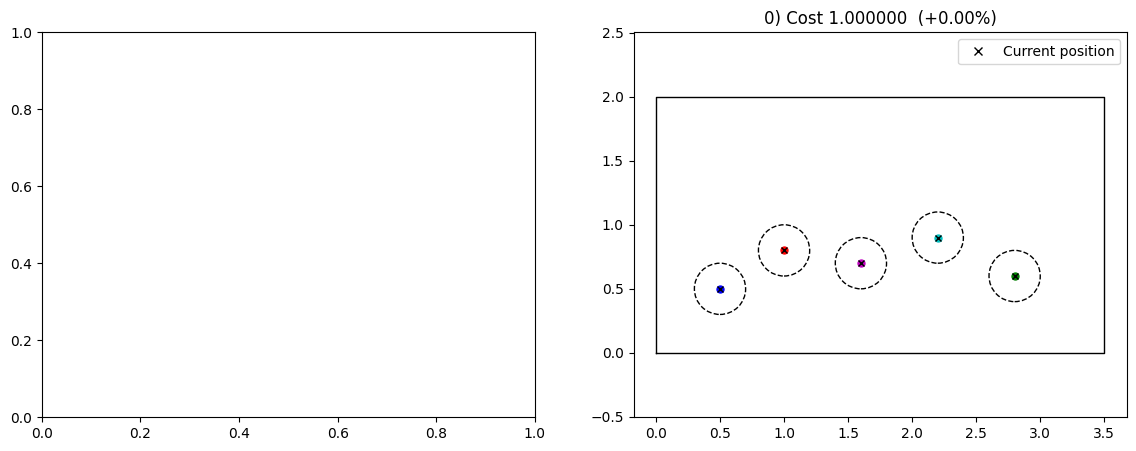

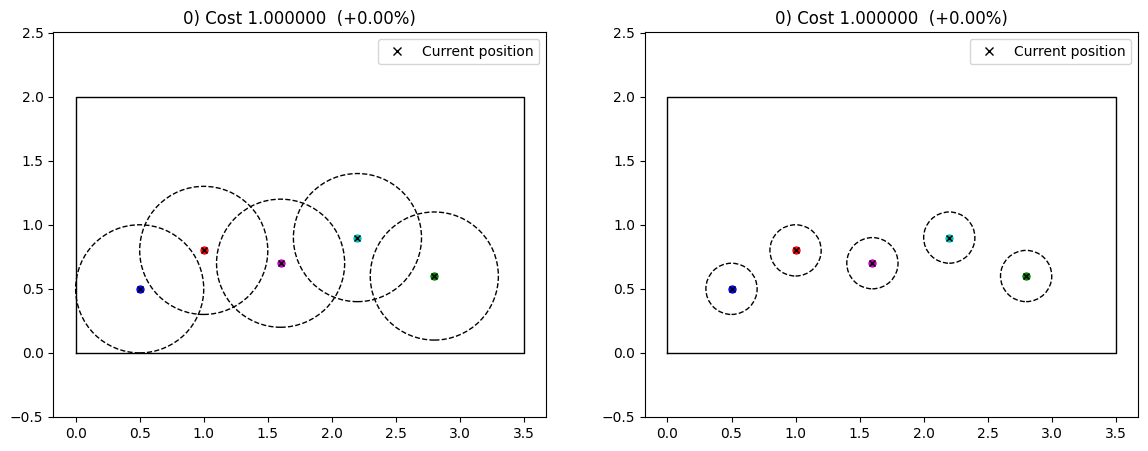

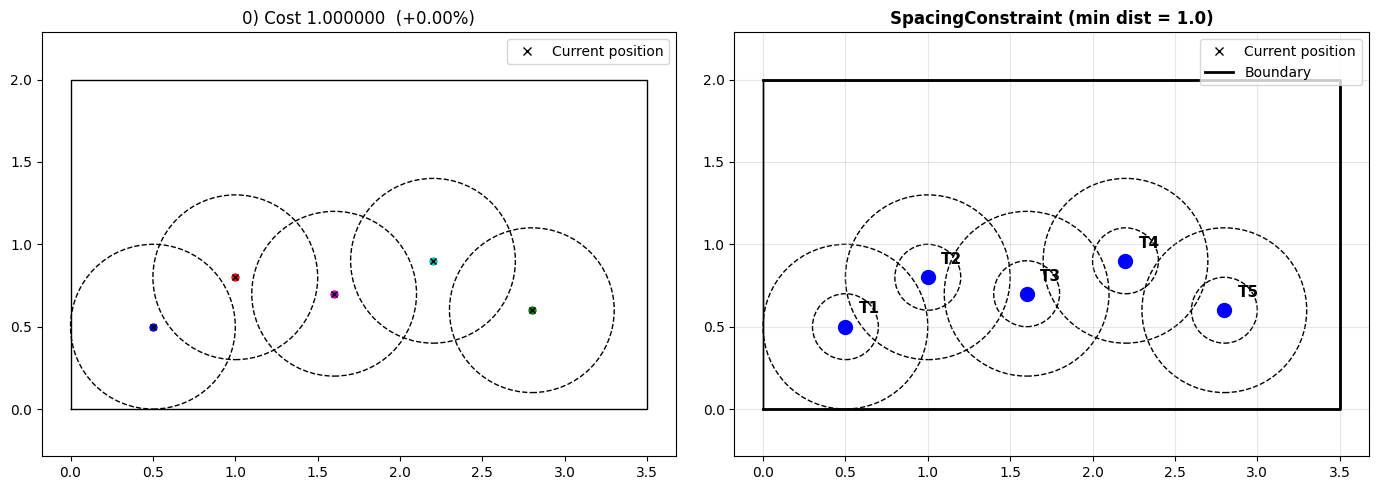

In [5]:
# Porównanie dwóch wartości spacing w subplotach
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

spacings = [0.4, 1.0]
positions = [0, 1]

x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])
dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

for spacing, ax, pos in zip(spacings, axes, positions):
    tf = TopFarmProblem(
        design_vars={'x': x5, 'y': y5},
        cost_comp=dummy_cost5,
        constraints=[
            XYBoundaryConstraint(boundary_big, 'polygon'),
            SpacingConstraint(spacing)
        ],
        plot_comp=XYPlotComp()
    )
    
    tf.setup()
    tf.evaluate()
    
    # Rysujemy na danym subplot
    plt.sca(ax)
    tf.plot_comp.plot_constraints()
    ax.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', linewidth=2, label='Boundary')
    ax.scatter(x5, y5, s=100, c='blue', zorder=5)
    
    # Etykiety turbin
    for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
        ax.text(xx + 0.08, yy + 0.08, f"T{i}", fontsize=11, fontweight='bold')
    
    ax.set_title(f"SpacingConstraint (min dist = {spacing})", fontsize=12, fontweight='bold')
    ax.axis("equal")
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Opis kroku: W tym etapie skupiliśmy się na czytelności prezentowanych wyników, wybierając opcję ulepszenia wizualizacji (Opcja A). Stworzyliśmy wykres z dwoma podwykresami (subplots), aby bezpośrednio porównać wpływ różnych wartości minimalnego dystansu (spacing=0.4 vs spacing=1.0) na ten sam układ turbin.

Wnioski z analizy (perspektywa projektowa):

Wizualizacja ograniczeń: Dzięki zastosowaniu dwóch podwykresów obok siebie, wyraźnie widać, jak strefy ochronne wokół turbin (okręgi) powiększają się wraz ze wzrostem parametru spacing.

Spełnienie norm: Na wykresie dla spacing=0.4 okręgi mogą się nie stykać, co sugeruje poprawność układu. Jednak po zwiększeniu parametru do 1.0 (co może wynikać z zaostrzonych norm bezpieczeństwa lub większych średnic wirnika), te same pozycje turbin mogą zacząć na siebie nachodzić.

Praktyka inżynierska: Takie porównanie jest kluczowe na etapie "pre-feasibility study". Pozwala ono projektantowi szybko ocenić, czy założony model turbiny (wymagający konkretnego odstępu) zmieści się w granicach działki przy zachowaniu maksymalnej wydajności energetycznej.

Efekt ulepszenia: Dodanie czytelnych etykiet (T1..T5), siatki (grid) oraz zachowanie skali (axis('equal')) pozwala na precyzyjną ocenę odległości "na oko" przed uruchomieniem algorytmów optymalizacyjnych.